In [1]:
class LinearCongruentialGenerator:
    def __init__(self, seed, a=1664525, c=1013904223, m=2**32):
        self.seed = seed
        self.a = a
        self.c = c
        self.m = m

    def generate(self):
        self.seed = (self.a * self.seed + self.c) % self.m
        return self.seed / self.m

    def generate_sequence(self, n):
        sequence = []
        for _ in range(n):
            sequence.append(self.generate())
        return sequence

def theoretical_mean(a, c, m):
    return (c / (m - 1)) * (1 + (a - 1) / 2)

def theoretical_variance(a, c, m):
    return (c**2 / ((m - 1) * (m - 2))) * (1 + ((a**2 - 1) * m) / (12 * (a**2 * (m - 1))))

In [2]:
import numpy as np


seed = 42  # starting seed
lcg = LinearCongruentialGenerator(seed)

# Generate a sequence of pseudo-random numbers
sequence_length = 10000
sequence = lcg.generate_sequence(sequence_length)

# Calculate empirical mean and variance
empirical_mean = np.mean(sequence)
empirical_variance = np.var(sequence)

# Calculate theoretical mean and variance
theoretical_mean_value = theoretical_mean(lcg.a, lcg.c, lcg.m)
theoretical_variance_value = theoretical_variance(lcg.a, lcg.c, lcg.m)

print("Empirical mean:", empirical_mean)
print("Theoretical mean:", theoretical_mean_value)
print("Empirical variance:", empirical_variance)
print("Theoretical variance:", theoretical_variance_value)


Empirical mean: 0.5040303973956034
Theoretical mean: 196470.63932919866
Empirical variance: 0.08449864295986069
Theoretical variance: 0.0603720951630528


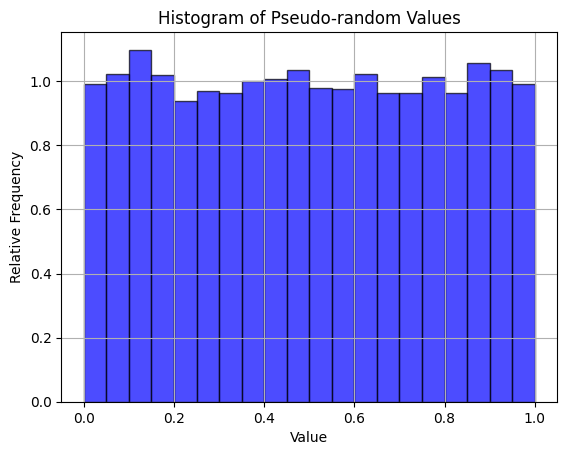

In [3]:
from matplotlib import pyplot as plt


def plot_histogram(sequence):
    plt.hist(sequence, bins=20, density=True, alpha=0.7, color='blue', edgecolor='black')
    plt.xlabel('Value')
    plt.ylabel('Relative Frequency')
    plt.title('Histogram of Pseudo-random Values')
    plt.grid(True)
    plt.show()

# Generate a sequence of pseudo-random numbers
sequence_length = 10000
sequence = lcg.generate_sequence(sequence_length)

# Plot histogram of pseudo-random values
plot_histogram(sequence)


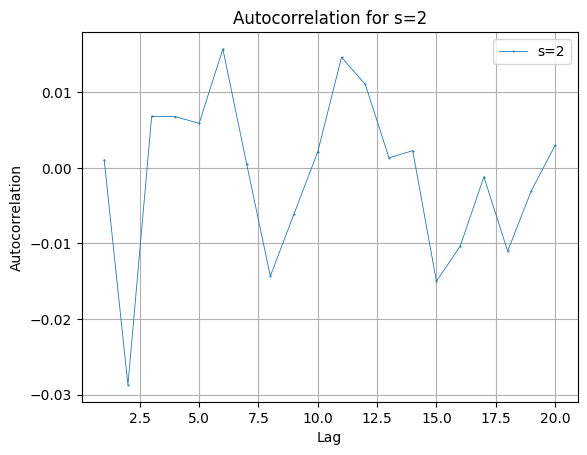

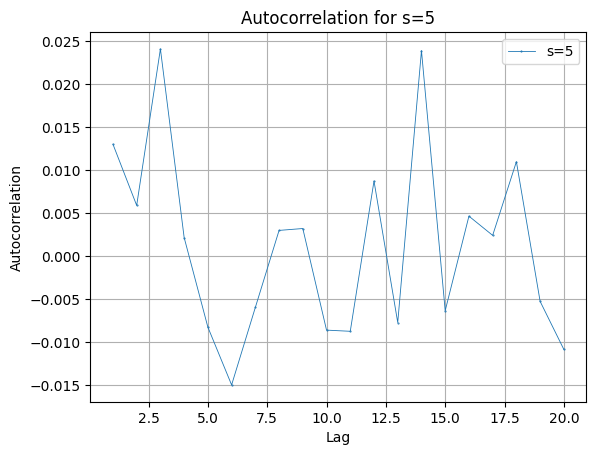

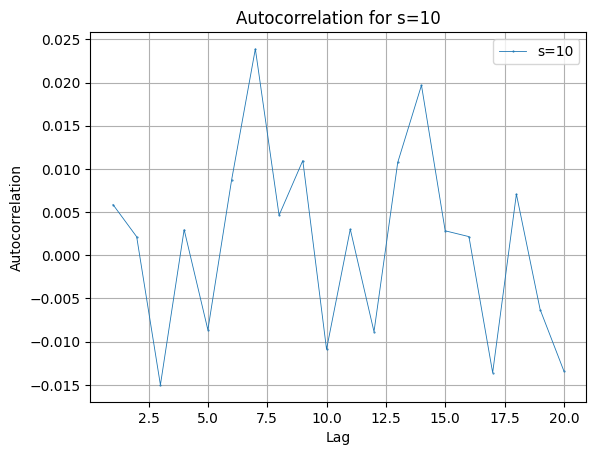

In [11]:
def plot_autocorrelation_for_steps_in_separate_windows(sequence, steps):
    for step in steps:
        autocorr_values = [autocorrelation(sequence, step * lag) for lag in range(1, max_lag + 1)]
        lags = np.arange(1, max_lag + 1)
        plt.plot(lags, autocorr_values, label=f's={step}', marker='o', markersize=0.5, linewidth=0.6)

        plt.xlabel('Lag')
        plt.ylabel('Autocorrelation')
        plt.title(f'Autocorrelation for s={step}')
        plt.legend()
        plt.grid(True)
        plt.show()

# Define steps for correlation calculation
steps = [2, 5, 10]

# Plot autocorrelation for different steps in separate windows
plot_autocorrelation_for_steps_in_separate_windows(sequence, steps)
